<a href="https://colab.research.google.com/github/jasminl/chaos/blob/main/henon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

import numpy as np

In [ ]:
def henon(x, y):
  try:
    a = 1.4
    b = -0.3
    out = (a - x**2 + b * y, x)
    return out
  except OverflowError as e:
    print('Error: ', a, x, b, y)
    return (x,y)

def listdist(item0, item1):
  return np.sqrt((item0[0] - item1[0]) * (item0[0] - item1[0]) + (item0[1] - item1[1]) * (item0[1] - item1[1]))

In [ ]:
# Implement the henon map and test for stable cycle
x = 1
y = 1

max_iter = 100
thresh = 0.01
overflow_thresh = 100000

@np.vectorize
def test_converge(start_x, start_y):
  buffer = [(start_x, start_y), henon(start_x, start_y)]
  for n in range(max_iter):
    buffer.append(henon(buffer[-1][0], buffer[-1][1]))
    if np.isnan(buffer[-1][0]) or np.isnan(buffer[-1][1]):
      return 0  # Diverges to infinity
    if np.abs(buffer[-1][0]) > overflow_thresh or np.abs(buffer[-1][1]) > overflow_thresh:
      return 0
    if listdist(buffer[0], buffer[-1]) < thresh:
      return 1  # Convers to 2-cycle limit point
    buffer.pop(0)
  return 0  # Neither converge nor diverge, mark as not converge

test_converge(x, y)

array(1)

In [ ]:
xrange = np.arange(-2.5, 2.5, 0.01)
yrange = np.arange(-2.5, 2.5, 0.01)

mesh = np.meshgrid(xrange, yrange)
test = test_converge(mesh[0], mesh[1])

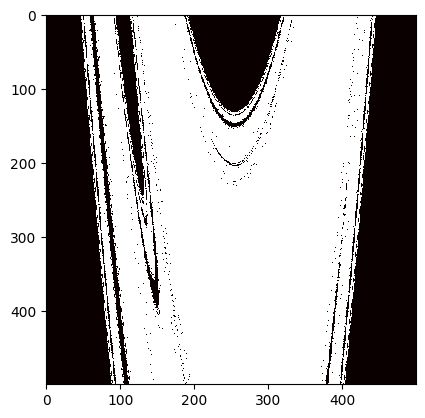

In [ ]:
plt.imshow(test, cmap='hot', interpolation='nearest')
plt.show()